# Leaf Disease Detection Program using CNN with Keras API

# Training Phase

(1) 사용할 패키지 불러오기

In [21]:
import numpy as np
import keras
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.models import load_model

(2) 데이터 셋 불러오기, 생성하기

In [22]:
np.random.seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 10,
                                   width_shift_range = 10,
                                   height_shift_range = 0.2,
                                   shear_range = 0.7,
                                   zoom_range = [0.9, 2.2],
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory('rawDataG/train',
                                                    target_size = (32,32),
                                                    batch_size = 3,
                                                    class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory('rawDataG/test',
                                                  target_size = (32,32),
                                                  batch_size = 3,
                                                  class_mode = 'categorical')

Found 4522 images belonging to 4 classes.
Found 1134 images belonging to 4 classes.


(3) 학습 모델 구성하기

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

(4) 모델 학습과정 설정하기

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

(5) 학습 모델 표시하기

In [25]:
plot_model(model, to_file='modelG.png', show_shapes =True, show_layer_names = True, rankdir = 'TB')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 516       
Total params: 1,625,668
Trainable params: 1,625,668
Non-trainable params: 0
_________________________________________________________________


(6) 모델 학습시키기

In [26]:
class outputImages(keras.callbacks.Callback):
    def __init__(self, input_data):
        self.input_data = input_data
    
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0:
            get_model_layers_output_combined_image(self.model, self.input_data)
            
output_images = outputImages(keras.callbacks.Callback)
history = model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=100,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/100
15/15 [==============================] - 4s 234ms/step - loss: 1.3211 - acc: 0.3778 - val_loss: 1.2237 - val_acc: 0.7333
Epoch 2/100
15/15 [==============================] - 2s 120ms/step - loss: 1.1312 - acc: 0.6667 - val_loss: 1.1532 - val_acc: 0.7333
Epoch 3/100
15/15 [==============================] - 2s 141ms/step - loss: 0.7059 - acc: 0.7333 - val_loss: 1.0354 - val_acc: 0.7333
Epoch 4/100
15/15 [==============================] - 2s 120ms/step - loss: 0.9697 - acc: 0.7333 - val_loss: 0.9873 - val_acc: 0.7333
Epoch 5/100
15/15 [==============================] - 2s 108ms/step - loss: 0.6934 - acc: 0.7778 - val_loss: 0.9425 - val_acc: 0.7333
Epoch 6/100
15/15 [==============================] - 2s 122ms/step - loss: 0.8390 - acc: 0.6444 - val_loss: 0.9077 - val_acc: 0.7333
Epoch 7/100
15/15 [==============================] - 2s 118ms/step - loss: 0.8843 - acc: 0.7111 - val_loss: 0.8930 - val_acc: 0.7333
Epoch 8/100
15/15 [==============================] - 2s 119ms/step - 

15/15 [==============================] - 2s 120ms/step - loss: 0.7172 - acc: 0.7778 - val_loss: 1.1355 - val_acc: 0.7333
Epoch 63/100
15/15 [==============================] - 2s 111ms/step - loss: 0.7717 - acc: 0.7778 - val_loss: 0.8295 - val_acc: 0.7333
Epoch 64/100
15/15 [==============================] - 2s 113ms/step - loss: 0.5056 - acc: 0.8000 - val_loss: 0.9296 - val_acc: 0.7333
Epoch 65/100
15/15 [==============================] - 2s 108ms/step - loss: 0.5708 - acc: 0.8222 - val_loss: 0.8474 - val_acc: 0.7333
Epoch 66/100
15/15 [==============================] - 2s 114ms/step - loss: 0.5596 - acc: 0.8000 - val_loss: 0.8052 - val_acc: 0.7333
Epoch 67/100
15/15 [==============================] - 2s 115ms/step - loss: 0.6712 - acc: 0.7778 - val_loss: 0.7889 - val_acc: 0.7333
Epoch 68/100
15/15 [==============================] - 2s 113ms/step - loss: 0.8325 - acc: 0.7111 - val_loss: 0.7833 - val_acc: 0.7333
Epoch 69/100
15/15 [==============================] - 2s 103ms/step - loss:

(7) 모델 학습 모니터링 하기

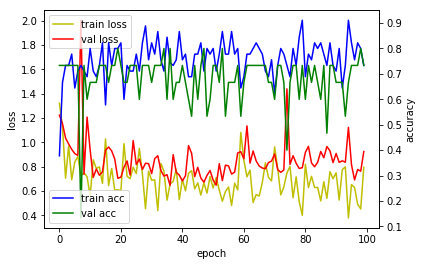

In [27]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

(8) 검증 모델 테스트 예시

In [28]:
print("-- Test --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Test --
{'mildew': 0, 'mold': 1, 'mosaic': 2, 'rust': 3}
[[0.992 0.001 0.000 0.007]
 [0.953 0.014 0.007 0.027]
 [0.817 0.065 0.043 0.074]
 [0.901 0.033 0.021 0.045]
 [0.000 0.000 0.000 1.000]
 [0.929 0.022 0.011 0.039]
 [0.861 0.047 0.030 0.062]
 [0.965 0.009 0.002 0.023]
 [0.788 0.089 0.043 0.080]
 [0.993 0.001 0.000 0.006]
 [0.948 0.014 0.006 0.033]
 [0.309 0.448 0.182 0.061]
 [0.884 0.046 0.022 0.048]
 [0.910 0.062 0.004 0.024]
 [0.972 0.006 0.003 0.019]]


(9) 모델 평가하기

In [29]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 73.33%


(10) 모델 구조 및 학습된 모델 가중치 저장하기

In [30]:
model.save('leaf_diseaseG.h5')
with open('model_architectureG.json', 'w') as f:
    f.write(model.to_json())
#model.load_weights('leaf_disease.h5')